## Credit Card Fraud Detection
#### Anonymized credit card transactions labeled as fraudulent or genuine
*source*: [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation (due to confidentiality issues). Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
* Feature '**Time**' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* The feature '**Amount**' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
* Feature '**Class**' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
dataFrame = pd.read_csv("creditcard.csv")
# dataFrame = pd.read_csv("creditcard.csv", nrows=1000)
dataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
Y = dataFrame['Class']

Text(0.5,1,'Class')

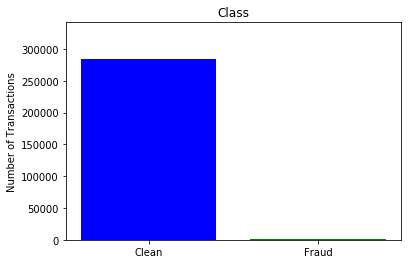

In [51]:
fig, ax = plt.subplots()
pm, pc = plt.bar(np.unique(Y), [np.sum((Y == cls).astype(int)) for cls in np.unique(Y)])
pm.set_facecolor('b')
pc.set_facecolor('g')
ax.set_xticks(np.unique(Y))
ax.set_xticklabels(['Clean', 'Fraud'])
ax.set_ylim([0, 1.2 * Y.shape[0]])
ax.set_ylabel('Number of Transactions')
ax.set_title('Class')